<a href="https://colab.research.google.com/github/RanganathJoshi/Beginner-Projects/blob/main/Classifying_Image_of_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
#Loading Data or Splitting Data into train and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[0]

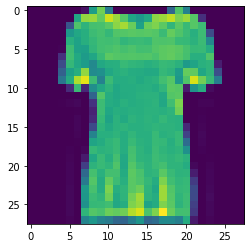

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10])

In [ ]:
x_train[10]

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Trouser')

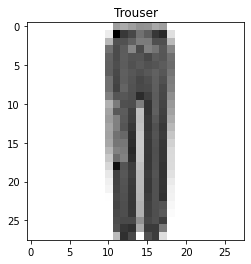

In [ ]:
#Converting RGB image to a Gray Scale Image
index_intrested=1000
plt.imshow(x_train[index_intrested],cmap=plt.cm.binary)
plt.title(class_names[y_train[index_intrested]])

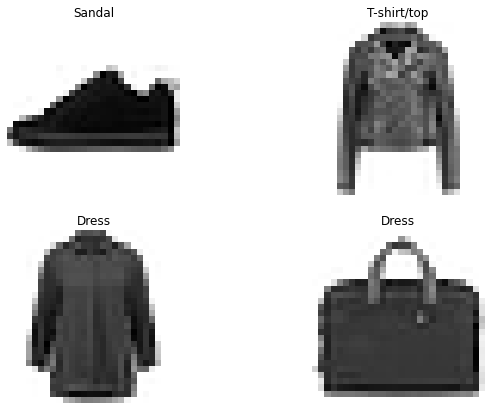

In [ ]:
#Displaying Random Images 
import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  plt.imshow(x_train[random.choice(range(len(x_train)))],cmap=plt.cm.binary)
  plt.title(class_names[y_train[random.choice(range(len(x_train)))]])
  plt.axis(False)

Multiclass classificaton models's architecture is same as that of Binary Classificaton,but there are little things to Tweak  on:
* Input shape=28x28
* output Shape=10(# of Classes)
* output activation=softmax(not sigmoid)
* loss=tf.keras.lossed.CatagorialCrossentropy()
  * IF your y labels are one_hot_encoded ,use Catagorical_cross_entrpy,else Use 
  Catagorical_cross_entrpy.

In [ ]:
model=tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28))
])
model.output_shape

(None, 784)

In [ ]:
tf.one_hot(y_train,depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
#Set random seed
tf.random.set_seed(12)
model_1=tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(10,activation='softmax')
])

#Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fitting the model
non_norm_history=model_1.fit(x_train, tf.one_hot(y_train,depth=10),epochs=10,validation_data=(x_test,tf.one_hot(y_test,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4928 - accuracy: 0.0967 - val_loss: 2.3017 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2952 - accuracy: 0.1050 - val_loss: 2.2530 - val_accuracy: 0.1251
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2673 - accuracy: 0.1154 - val_loss: 2.2406 - val_accuracy: 0.1317
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2184 - accuracy: 0.1366 - val_loss: 2.2041 - val_accuracy: 0.1420
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1554 - accuracy: 0.1625 - val_loss: 2.0517 - val_accuracy: 0.1894
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9161 - accuracy: 0.2353 - val_loss: 1.6630 - val_accuracy: 0.3457
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6041 - accuracy: 0.3445 - val_loss: 1.5718 - val_accuracy:

IF you get Shape Error,you have 2 things to look at
* Flatten()
* if your y labels are endoed or not

In [ ]:
#Its very necassary to Scale the train and test Data
#2 methods of scaling
#1.Normalization(values between 0 and 1)
#2.Standardization(data to have mean 0 and std to 1)


In [ ]:
#Scaling our data
x_train_norm=x_train/255.0
x_test_norm=x_test/255.0

#Now checking the minimun and maximun values of the Data(Expected to be between 0 and 1)
x_train_norm.min(),x_train_norm.max()

(0.0, 1.0)

#Now lets fit the model with the normalized Data

In [ ]:
#Set random_seed
tf.random.set_seed(121)

#Create a Model
model_2=tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(10,activation='softmax')
])

#Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fitting the model
norm_history=model_2.fit(x_train_norm, tf.one_hot(y_train,depth=10),epochs=10,validation_data=(x_test_norm,tf.one_hot(y_test,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2167 - accuracy: 0.5353 - val_loss: 0.8171 - val_accuracy: 0.7128
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6968 - accuracy: 0.7651 - val_loss: 0.6624 - val_accuracy: 0.7784
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6165 - accuracy: 0.7923 - val_loss: 0.6417 - val_accuracy: 0.7863
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5864 - accuracy: 0.8018 - val_loss: 0.6016 - val_accuracy: 0.7958
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5662 - accuracy: 0.8062 - val_loss: 0.5914 - val_accuracy: 0.7975
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5530 - accuracy: 0.8096 - val_loss: 0.5889 - val_accuracy: 0.7957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5441 - accuracy: 0.8127 - val_loss: 0.5774 - val_accuracy:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd1e4284690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd1e421fcd0>)

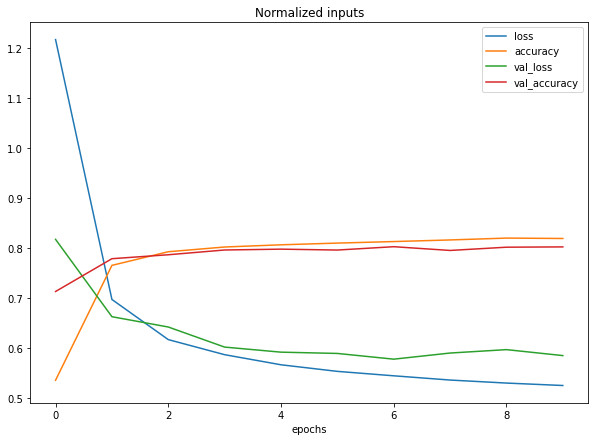

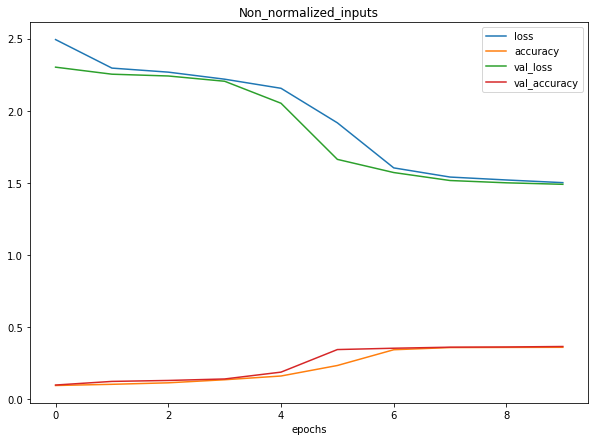

In [ ]:
pd.DataFrame(norm_history.history).plot(figsize=(10,7),xlabel='epochs',title='Normalized inputs'),pd.DataFrame(non_norm_history.history).plot(figsize=(10,7),xlabel='epochs',title='Non_normalized_inputs')



> Choosing the Best Learning rate

In [ ]:
#Set random_seed
tf.random.set_seed(121)

#Create a Model
model_3=tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(10,activation='softmax')
])

#Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Creating Learning rate callback
lr_scdular=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#Fitting the model
model_3_history=model_3.fit(x_train_norm, tf.one_hot(y_train,depth=10),epochs=40,validation_data=(x_test_norm,tf.one_hot(y_test,depth=10)),callbacks=[lr_scdular])

Text(0.5, 0, 'learnin rate')

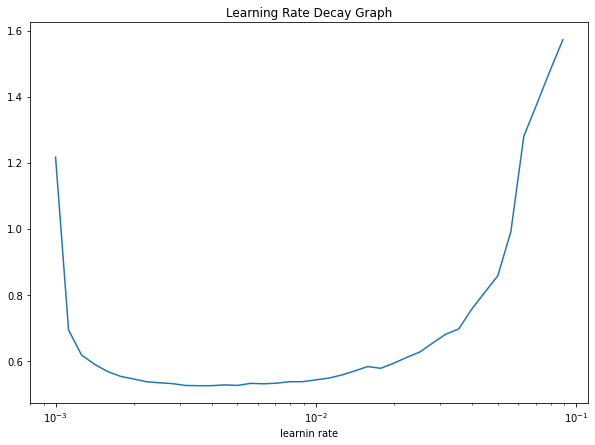

In [ ]:
import numpy as np
lr=1e-3 * 10**(tf.range(40)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lr,model_3_history.history['loss'])
plt.title('Learning Rate Decay Graph')
plt.xlabel('learnin rate')

In [ ]:
#Set random_seed
tf.random.set_seed(121)

#Create a Model
model_3=tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(10,activation='softmax')
])

#Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])


#Fitting the model
model_3_history=model_3.fit(x_train_norm, tf.one_hot(y_train,depth=10),epochs=40,validation_data=(x_test_norm,tf.one_hot(y_test,depth=10)))

In [ ]:
#Predicting models output
y_probs=model_3.predict(x_test_norm)
y_pred=tf.argmax(y_probs,axis=1)


#Creating a Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[776,   2,  31,  89,   3,   1,  84,   0,  14,   0],
       [  2, 956,  10,  27,   4,   0,   0,   0,   1,   0],
       [ 24,  11, 709,  18, 168,   0,  65,   0,   5,   0],
       [ 40,  31,  27, 842,  26,   2,  29,   0,   2,   1],
       [  2,  10, 111,  36, 784,   0,  55,   0,   2,   0],
       [  1,   1,   0,   0,   0, 889,   0,  49,   8,  52],
       [172,   3, 125,  77, 166,   0, 444,   0,  13,   0],
       [  0,   0,   0,   0,   0,  34,   0, 882,   0,  84],
       [ 14,   1,  20,   4,   2,  11,  20,   7, 920,   1],
       [  0,   0,   0,   0,   0,  20,   0,  29,   1, 950]])

> Making out Confusion matrix Prettier

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

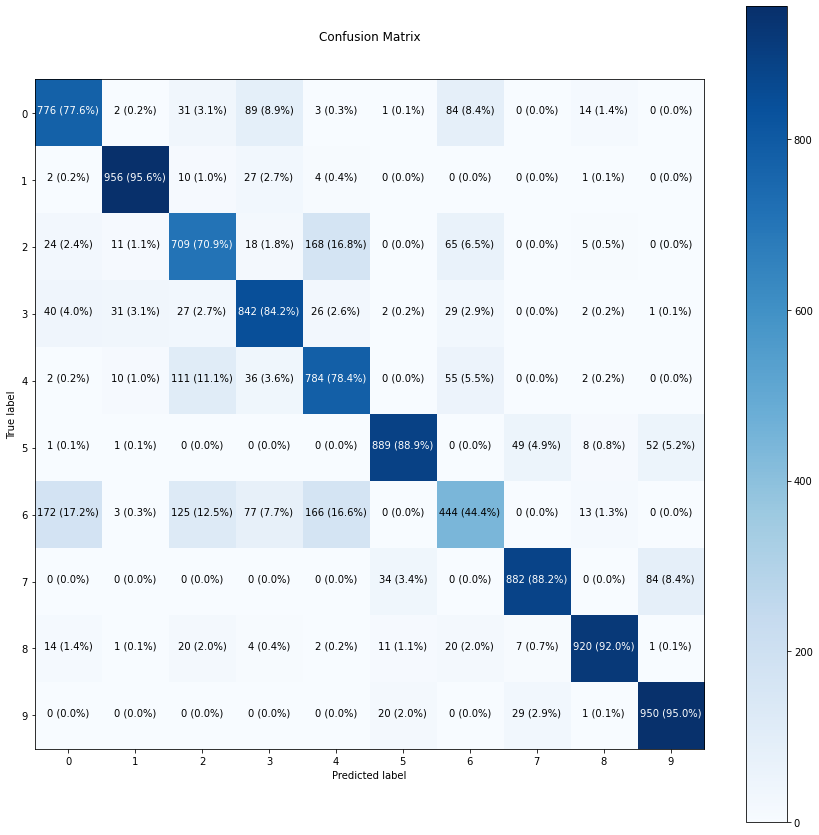

In [ ]:
make_confusion_matrix(y_test, y_pred, classes=None, figsize=(15, 15), text_size=10)

In [ ]:
len(x_test),np.size(x_test),x_test.shape

(10000, 7840000, (10000, 28, 28))

In [ ]:
#Predicting models output
y_probs=model_3.predict(x_test_norm)
y_pred=tf.argmax(y_probs,axis=1)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)))

AttributeError: ignored

#Plotting the random_image 

In [ ]:
import random
def plot_random_image(model,images,labels,classes):
  #Select Random image and display its Predicted prob/label and its true class

  i=random.randint(0,len(images))
  target_image=images[i]
  y_prob=model.predict(target_image.reshape(1,28,28))
  y_pred_label=classes[y_prob.argmax()]
  y_true=classes[labels[i]]

  #Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)


  #Plotting the color of the plot based on their Prediction 
  if y_pred_label==y_true:
    color='green'
    title='Predicted Correctly'
  else:
    color='red'
    title='Wrong prediction'
  
  plt.xlabel("y_pred:{} {:2.0f} (y_true:{})".format(y_pred_label,100*tf.reduce_max(y_prob),y_true),color=color)
  plt.title(title)

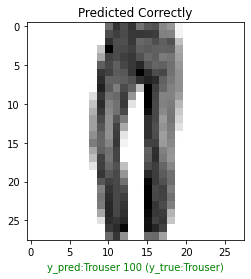

In [ ]:
plot_random_image(model_3,x_test_norm,y_test,class_names)